## This is Lab that work with London prices
**I want to lern how to use makrdown**<br>
*italic text*
- One
- Two
   - Three
   - Four
```python
print("Hello")
> This is a blockquote

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd

In [5]:
# Construct the file path to the parent directory
file_path = os.path.join('kaggle_london_house_price_data.csv')

# Load the data
df = pd.read_csv(file_path)

# Drop rows with missing values
df = df.dropna(subset=["floorAreaSqM", "saleEstimate_currentPrice"])

In [6]:
# Print number of rows
print("Number of rows: ", len(df))
# Print average estimated price
print("Average estimated price: ", df["saleEstimate_currentPrice"].mean())

Number of rows:  266633
Average estimated price:  879453.9873158986


In [14]:
# Separate data on training and test set
train = df.sample(frac=0.8, random_state=200)
test = df.drop(train.index)
print("Number of rows in training set: ", len(train))
print("Number of rows in test set: ", len(test))

Number of rows in training set:  213306
Number of rows in test set:  53327


In [16]:
# Plot diviation prices
dl = [0] * 22
for y in train[["saleEstimate_currentPrice"]].values:
    # count values less then 150000
    if y < 60000:
        dl[0] = dl[0] + 1
    elif y >= 60000 and y < 100000:
        dl[1] = dl[1] + 1
    elif y >= 100000 and y < 140000:
        dl[2] = dl[2] + 1
    elif y >= 140000 and y < 180000:
        dl[3] = dl[3] + 1
    elif y >= 180000 and y < 220000:
        dl[4] = dl[4] + 1
    elif y >= 220000 and y < 260000:
        dl[5] = dl[5] + 1
    elif y >= 260000 and y < 300000:
        dl[6] = dl[6] + 1
    elif y >= 300000 and y < 340000:
        dl[7] = dl[7] + 1
    elif y >= 340000 and y < 380000:
        dl[8] = dl[8] + 1
    elif y >= 380000 and y < 420000:
        dl[9] = dl[9] + 1
    elif y >= 420000 and y < 460000:
        dl[10] = dl[10] + 1
    elif y >= 460000 and y < 500000:
        dl[11] = dl[11] + 1
    elif y >= 500000 and y < 540000:
        dl[12] = dl[12] + 1
    elif y >= 540000 and y < 580000:
        dl[13] = dl[13] + 1
    elif y >= 580000 and y < 620000:
        dl[14] = dl[14] + 1
    elif y >= 620000 and y < 660000:
        dl[15] = dl[15] + 1
    elif y >= 660000 and y < 700000:
        dl[16] = dl[16] + 1
    elif y >= 700000 and y < 740000:
        dl[17] = dl[17] + 1
    elif y >= 740000 and y < 780000:
        dl[18] = dl[18] + 1
    elif y >= 780000 and y < 820000:
        dl[19] = dl[19] + 1
    elif y >= 820000 and y < 860000:
        dl[20] = dl[20] + 1
    elif y >= 860000 and y < 900000:
        dl[21] = dl[21] + 1
  
print(dl)

[0, 2, 53, 372, 1229, 2971, 6186, 8995, 11032, 13616, 14474, 14233, 12654, 11455, 9882, 9107, 7966, 6915, 6277, 5798, 5472, 4447]


0.0
0.0007500946994558063
0.019877509535578868
0.13951761409877997
0.46093319281559303
1.1142656760416
2.320042905416809
3.3735509108024893
4.1375223621982276
5.10664471389513
5.42843533996167
5.338048928677246
4.745849163456886
4.296167391133131
3.706217910011139
3.415556213972014
2.9876271879324765
2.59345242336845
2.354172214242048
2.1745245337223826
2.052259097711086
1.6678355642399854


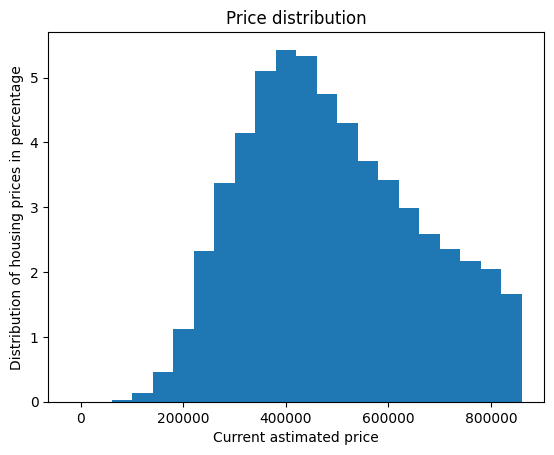

In [ ]:
# Plot histogram set
dlcc = dl
for i in range(0, 22):
    dlcc[i] = ( dlcc[i] / len(df) ) * 100
    print(dlcc[i])
plt.bar(range(0, 880000, 40000), dlcc, width=40000)
plt.xlabel("Current astimated price")
plt.ylabel("Distribution of housing prices in percentage")
plt.title("Price distribution")
plt.show()


In [20]:
# Ptint minimal and maximal current price
print(train["saleEstimate_currentPrice"].min())
print(train["saleEstimate_currentPrice"].max())



89000.0
25681000.0


In [21]:
# Add a column for the log of the sale estimate
X = train[["floorAreaSqM"]].values
y = train[["saleEstimate_currentPrice"]].values

# Create a linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

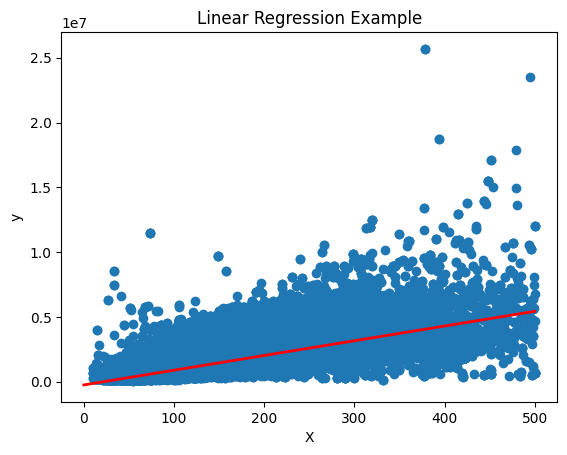

In [22]:
# Make predictions
X_new = np.array([[0], [500]])
y_predict = model.predict(X_new)

# Plot the results
plt.scatter(X, y)
plt.plot(X_new, y_predict, color='red', linewidth=2)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Example")
plt.show()

In [23]:
# Print the coefficients
print("Intercept:", model.intercept_)
print("Slope:", model.coef_)

Intercept: [-251251.41332891]
Slope: [[11363.02768247]]


In [26]:
# Оценить модель на тестовом наборе, используя среднеквадратичную ошибку (MSE) деленную на количество строк в начальном наборе данных
X_test = test[["floorAreaSqM"]].values
y_test = test[["saleEstimate_currentPrice"]].values
y_test_predict = model.predict(X_test)
mse = np.mean((y_test - y_test_predict) ** 2) / len(df)
print("Mean Squared Error:", mse)

Mean Squared Error: 1192213.9950738172
